![Astrofisica Computacional](../logo.png)

---
## 03. Astroquery


Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### About this notebook

In this worksheet we will present an example of the use of `Astroquery` to get the spectrum of an object from the SDSS database. 

---

---

## Obtaining an spectrum from the SDSS

First, we import the functions we need,

In [2]:
# Required to see plots when running on mybinder
import matplotlib 
matplotlib.use('Agg')

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

# Python standard-libraries to download data from the web
from urllib.parse import urlencode
from urllib.request import urlretrieve

#Some astropy submodules that you know already
from astropy import units as u
from astropy import coordinates as coords
from astropy.coordinates import SkyCoord
from astropy.io import fits


#only here to display images
from IPython.display import Image

# These are the new modules for this notebook
from astroquery.simbad import Simbad
from astroquery.sdss import SDSS

We will work with the galaxy [NGC5406](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NGC+5406)

In [26]:
galaxy_name = 'NGC5406'

# Information from the name of the galaxy in the SkyCoord server
galaxy = SkyCoord.from_name(galaxy_name)
galaxy

<SkyCoord (ICRS): (ra, dec) in deg
    (210.08384725, 38.91540956)>

In [28]:
# Get the coordinates of the galaxy
pos = coords.SkyCoord(galaxy.ra, galaxy.dec, frame='icrs')
pos

<SkyCoord (ICRS): (ra, dec) in deg
    (210.08384725, 38.91540956)>

### Image of the galaxy

We will get the image of the galaxy from the [SDSS DR12 cutout service](http://skyservice.pha.jhu.edu/sdsscutout/)

In [34]:
im_size = 3*u.arcmin # get a 25 arcmin square
im_pixels = 1024

# Define the URL to dowload the cutout
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=galaxy.ra.deg,
                              dec=galaxy.dec.deg,
                              width=im_pixels, height=im_pixels,
                              scale=im_size.to(u.arcsec).value/im_pixels))
url = cutoutbaseurl + '?' + query_string

# Download the image
image_name = galaxy_name+'_SDSS_cutout.jpg'
urlretrieve(url, image_name)

('NGC5406_SDSS_cutout.jpg', <http.client.HTTPMessage at 0x1280a1a60>)

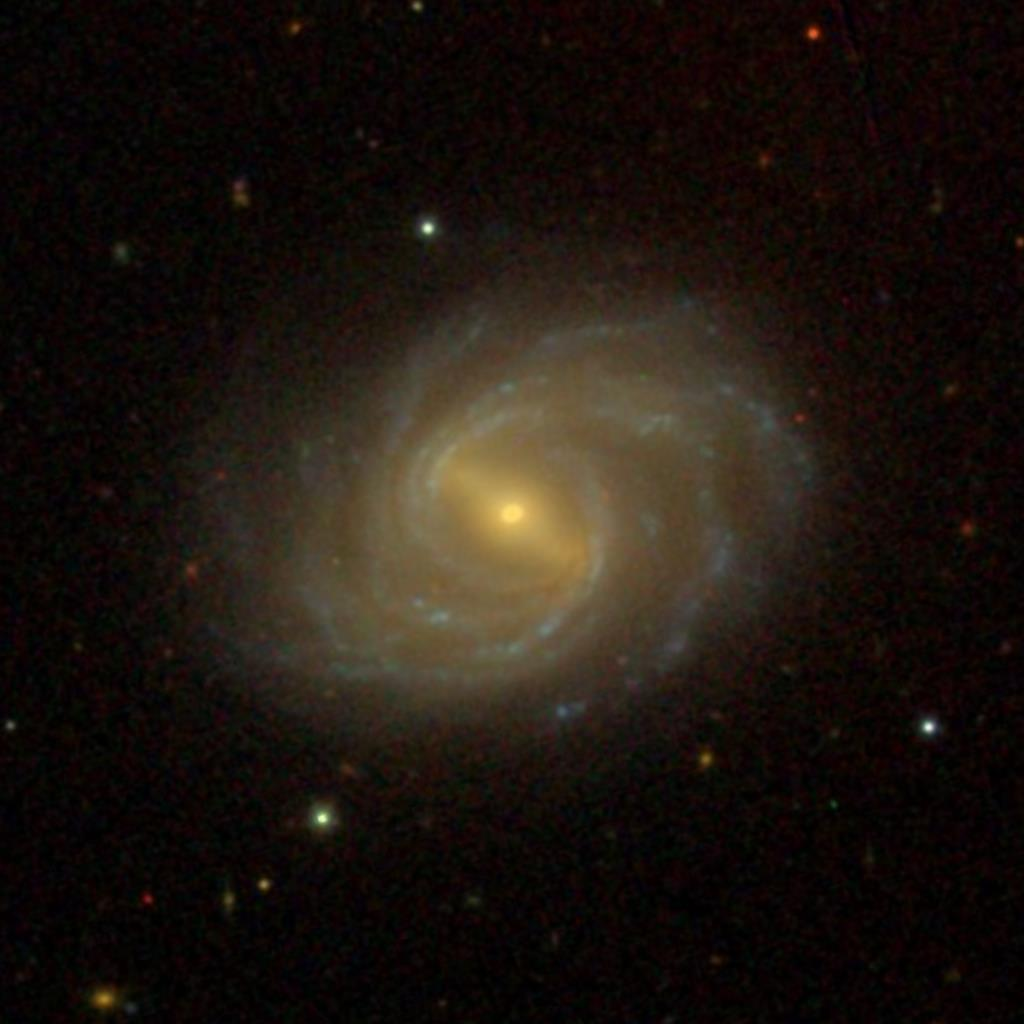

In [35]:
#load the .jpg image into the notebook
Image(image_name) 

### Data from the SDSS

Now we will get the identification numbers to grab the data from SDSS,

In [37]:
xid = SDSS.query_region(pos, spectro=True)
xid

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64
210.08382882614,38.9154295387748,1237662305650999364,3919,301,2,56,0.01797222,1379,53084,313,1552702060061812736,26
210.08382882614,38.9154295387748,1237662305650999364,3919,301,2,56,0.01794657,1379,53063,310,1552701235075770368,26


We obtain the spectra of the object from the SDSS

In [38]:
spectra = SDSS.get_spectra(matches=xid)
spectra

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1281144c0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x128126a60>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1280003d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1281da520>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1282461c0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x128268e20>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x12829da90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1282b3700>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x119457370>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x119469fa0>],
 [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1281261f0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x119483550>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11fc6e370>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x128154940>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x12814c280>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1

`spectra[0]` stores all the files related to the spectra for the object of interest. This is actually an array of several HDU in the FITS format

In [10]:
spectra[0]

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1184d9b80>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1184f6d60>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x118513bb0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x118526580>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11853a1f0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x118549e20>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x118562a90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x118579700>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x118591370>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11859ffa0>]

The spectrum is stored as a table in the component [0][1] of this object. That means that we can get the Table doing the following

In [39]:
spectra_data = spectra[0][1].data
spectra_data

FITS_rec([( 62.502903, 3.5823, 0.04032907, 0, 0, 1.1248522, 6.575012 ,  72.30464 ),
          ( 69.98336 , 3.5824, 0.03900119, 0, 0, 1.1247559, 5.3552294,  72.681595),
          ( 72.57643 , 3.5825, 0.0390003 , 0, 0, 1.1246598, 4.2488556,  73.24688 ),
          ...,
          (217.61299 , 3.9626, 0.03491322, 0, 0, 0.7174177, 2.2988968, 218.36652 ),
          (210.13846 , 3.9627, 0.03557049, 0, 0, 0.7175292, 3.1688683, 218.35341 ),
          (216.39406 , 3.9628, 0.03517528, 0, 0, 0.7176406, 3.705556 , 218.3403  )],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

Note the structure of that table. Pay attention to the field dtype (data type). It tells you the name of the different columns available in that table.

Please also check the documentation so that you can see what are the units https://data.sdss.org/datamodel/files/BOSS_SPECTRO_REDUX/RUN2D/spectra/PLATE4/spec.html

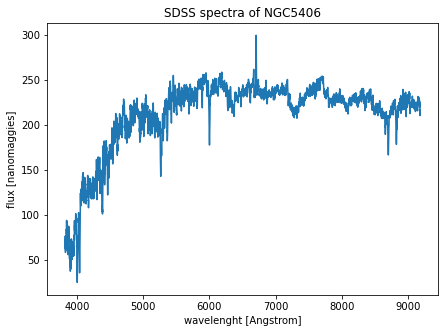

In [42]:
plt.figure(figsize=(7,5))
plt.plot(10**spectra_data['loglam'], spectra_data['flux'])
plt.xlabel('wavelenght [Angstrom]')
plt.ylabel('flux [nanomaggies]')
plt.title('SDSS spectra of '+galaxy_name)
plt.show()

The component [0][3] of the object 'spectra' contains the positions of some emission lines

In [43]:
lines = spectra[0][3].data
lines

FITS_rec([(1379, 53084, 313, 'Ly_alpha', 1215.67      , 0.        , -1.0000000e+00,   0.     , -1.      ,    0.      , -1.      ,  0.        , -1.        ,   0.      , -1.        ,  0,  0,  0.      ,  -1.      ),
          (1379, 53084, 313, 'N_V 1240', 1240.81      , 0.        , -1.0000000e+00,   0.     , -1.      ,    0.      , -1.      ,  0.        , -1.        ,   0.      , -1.        ,  0,  0,  0.      ,  -1.      ),
          (1379, 53084, 313, 'C_IV 1549', 1549.48      , 0.        , -1.0000000e+00,   0.     , -1.      ,    0.      , -1.      ,  0.        , -1.        ,   0.      , -1.        ,  0,  0,  0.      ,  -1.      ),
          (1379, 53084, 313, 'He_II 1640', 1640.42      , 0.        , -1.0000000e+00,   0.     , -1.      ,    0.      , -1.      ,  0.        , -1.        ,   0.      , -1.        ,  0,  0,  0.      ,  -1.      ),
          (1379, 53084, 313, 'C_III] 1908', 1908.734     , 0.        , -1.0000000e+00,   0.     , -1.      ,    0.      , -1.      ,  0.        ,

The lines in this spectrum are

In [44]:
lines['LINENAME']

chararray(['Ly_alpha', 'N_V 1240', 'C_IV 1549', 'He_II 1640',
           'C_III] 1908', 'Mg_II 2799', '[O_II] 3725', '[O_II] 3727',
           '[Ne_III] 3868', 'H_epsilon', '[Ne_III] 3970', 'H_delta',
           'H_gamma', '[O_III] 4363', 'He_II 4685', 'H_beta',
           '[O_III] 4959', '[O_III] 5007', 'He_II 5411', '[O_I] 5577',
           '[O_I] 6300', '[S_III] 6312', '[O_I] 6363', '[N_II] 6548',
           'H_alpha', '[N_II] 6583', '[S_II] 6716', '[S_II] 6730',
           '[Ar_III] 7135'], dtype='<U13')

We will plot three of these lines: '[O_II] 3727', '[O_III] 5007' and 'H_alpha'. The corresponding wavelengths are

In [45]:
for n in ['[O_II] 3727', '[O_III] 5007', 'H_alpha']:
    print(n, " ->", lines['LINEWAVE'][lines['LINENAME']==n])

[O_II] 3727  -> [3729.875448]
[O_III] 5007  -> [5008.23963773]
H_alpha  -> [6564.61389433]


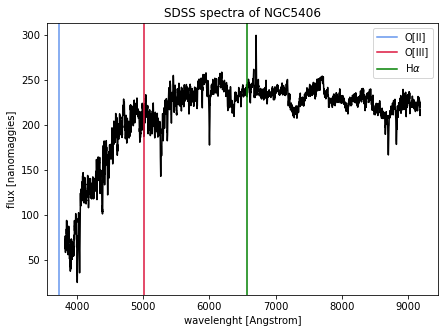

In [47]:
plt.figure(figsize=(7,5))
plt.plot(10**spectra_data['loglam'], spectra_data['flux'], color='black')
plt.axvline(x=lines['LINEWAVE'][lines['LINENAME']=='[O_II] 3727'], label=r'O[II]', color='cornflowerblue')
plt.axvline(x=lines['LINEWAVE'][lines['LINENAME']=='[O_III] 5007'], label=r'O[III]', color='crimson')
plt.axvline(x=lines['LINEWAVE'][lines['LINENAME']=='H_alpha'], label=r'H$\alpha$', color='green')

plt.xlabel('wavelenght [Angstrom]')
plt.ylabel('flux [nanomaggies]')
plt.title('SDSS spectra of '+galaxy_name)
plt.legend()
plt.show()

### Photometric image

Now we will obtain the photometric information of the galaxy.  We can get the images in the different SDSS bands (u,g,r,i,z)

The documentation describing the imaging data is here: https://data.sdss.org/datamodel/files/BOSS_PHOTOOBJ/frames/RERUN/RUN/CAMCOL/frame.html

In [48]:
# Get the photometric inoformation in the g-band
images = SDSS.get_images(matches=xid, band='g')
images

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1284484c0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x11f9ac100>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11f9a22b0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x128456160>],
 [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x12844ef40>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1284568b0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x128456700>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11faa2ca0>]]

The component [0][0] of the object 'images' contains the photometric information,

In [49]:
image_data =  images[0][0].data

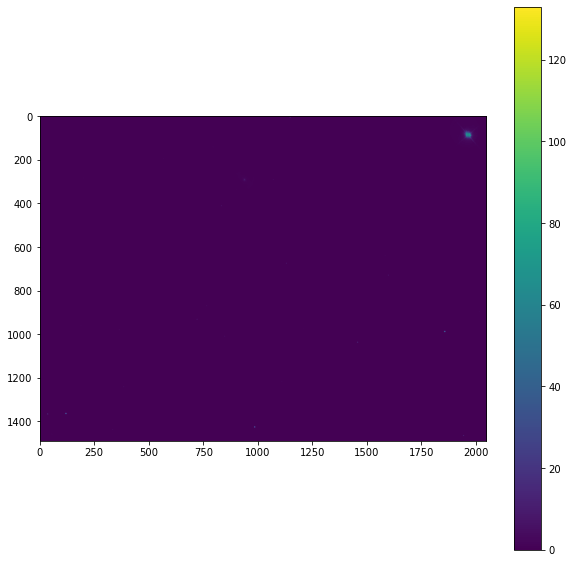

In [50]:
plt.figure(figsize=(10,10))
plt.imshow(image_data)
plt.colorbar()
plt.show()

The galaxy is not shown because the flux values in some of the pixels are very high compared to the typical flux.

To see the image, we will create a 'clipped image'. This will make that any pixel with a flux larger than 1 will be set 'normalized' to 1.

In [51]:
clipped_image = image_data.copy()
clipped_image[clipped_image>1.0]=1.0

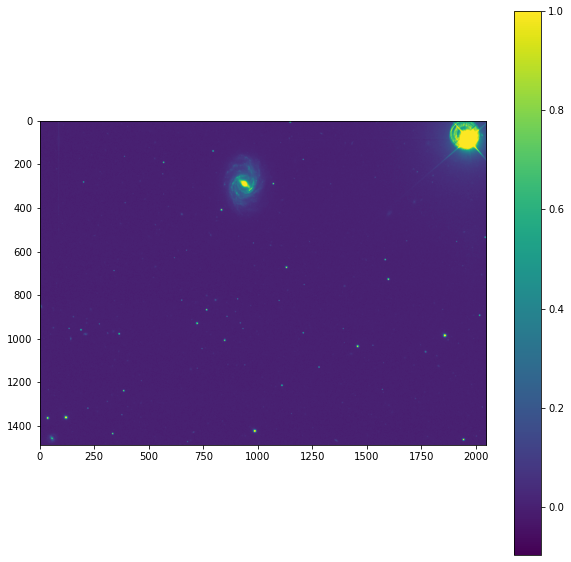

In [52]:
plt.figure(figsize=(10,10))
plt.imshow(clipped_image)
plt.colorbar()
plt.show()

Now the galaxy is shown. Now we will crop the image to the region where the galaxy is located,

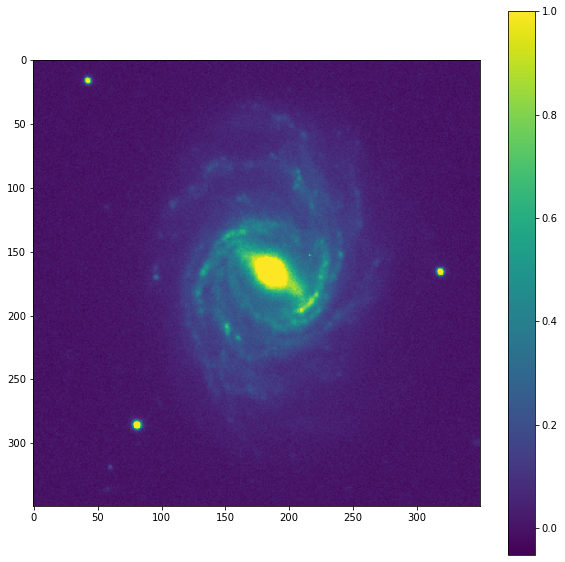

In [54]:
plt.figure(figsize=(10,10))
plt.imshow(clipped_image[125:475,750:1100])
plt.colorbar()
plt.show()

A similar result can be obtained from the original data by taking the logarithm of the flux.

/var/folders/rg/9mmttz3x0hz3mvcrk2c92x_h0000gn/T/ipykernel_58640/535572027.py:2: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(image_data[125:475,750:1100]))


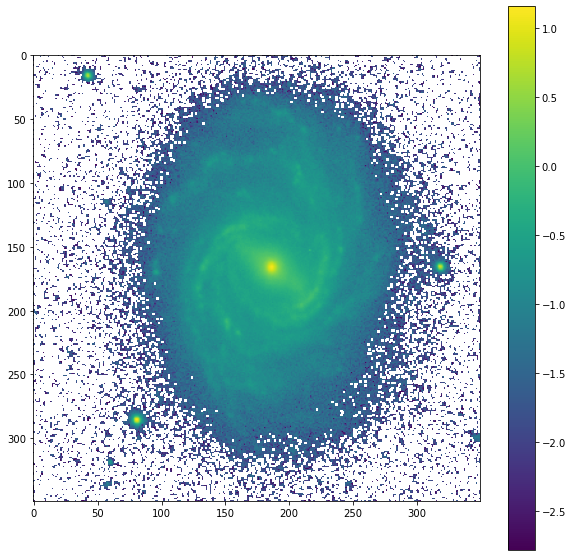

In [58]:
plt.figure(figsize=(10,10))
plt.imshow(np.log10(image_data[125:475,750:1100]))
plt.colorbar()
plt.show()

The missing points appear due to negative values in the image data. We can modify the image by using the minimum value,

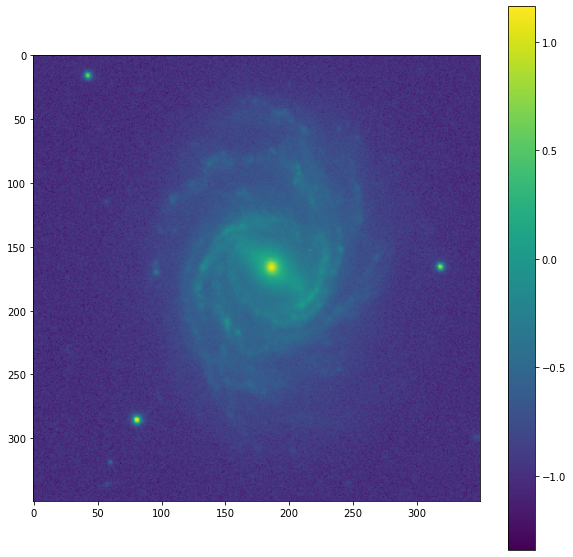

In [59]:
image_data2 = image_data - np.min(image_data)
plt.figure(figsize=(10,10))
plt.imshow(np.log10(image_data2[125:475,750:1100]))
plt.colorbar()
plt.show()

#### Exercise 1

Identify at least three of the lines seen in the spectrum of NGC5406. Using that information, what is the redshift of this galaxy?

#### Exercise 2

Download the FITS images in the filters u,g,r,z,i for NGC5406. Plot in five different panels the logarithm of the flux in each of the bands (always cropping around the galaxy). Why do the images look different?

#### Exercise 3

Compute the radial flux profile of NGC5406. To do that take 10 different lines starting from the center of the galaxy and plot the flux as a function of radius for those ten lines. What kind of function should fit your results?

#### Exercise 4

Repeat the same producedure of this notebook (including the exercises 2 and 3) for the galaxy `SDSS J013755.71+010004.9`.

Why does this galaxy look so different from NGC5406?
